### Simulation/Generation of Biomarkers

In [1]:
# TODO: create histogram of health and unhealthy patients given biomarker

# from biomarker_simulation import  # import BiomarkerSimulation
# from biomarker_utils import generate_transition_matrix, initialize_biomarkers
from mcmc_analysis import MCMCAnalysis
# from ebm.transformer import ContinuousDistributionFitter
# import numpy as np
# import matplotlib.pyplot as plt


# specify common parameters for biomarker stages
n_patients_stage = {
    1: 200, 2: 250, 3: 200, 4: 70, 5: 80,
    6: 60, 7: 50, 8: 40, 9: 40, 10: 30,
}

ModuleNotFoundError: No module named 'mcmc_analysis'

Sigmoidal Model:
X shape: (2040, 11)
Y shape: (2040,)


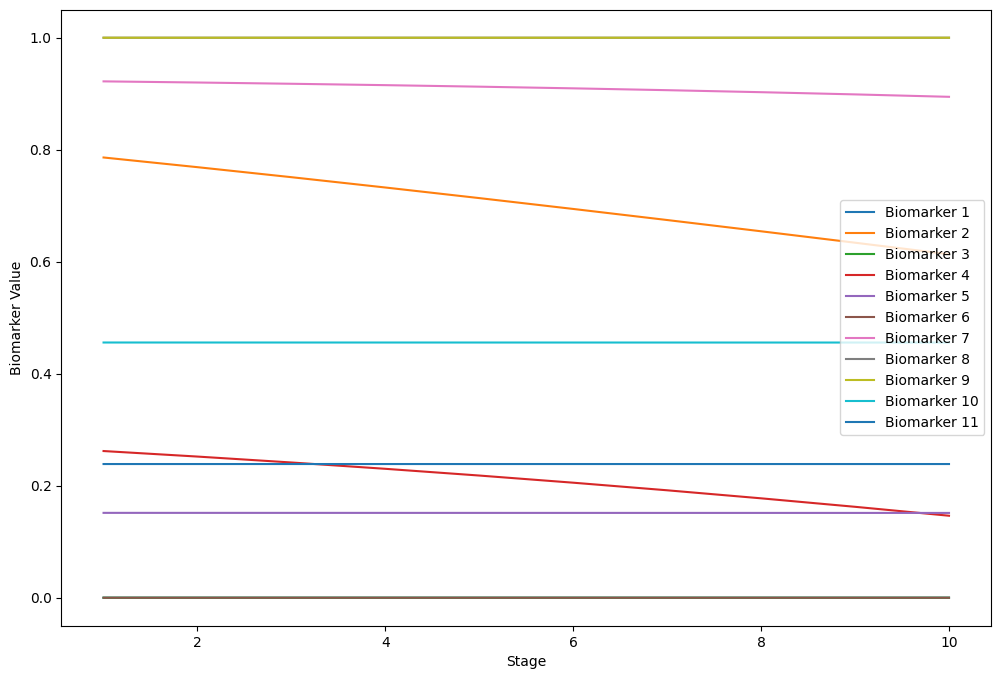

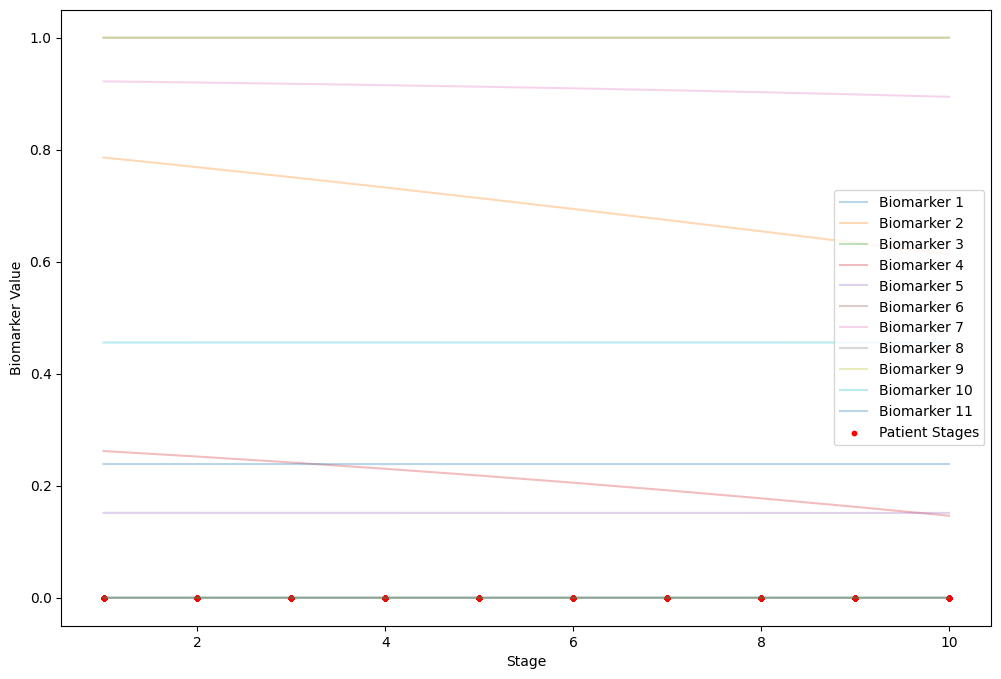

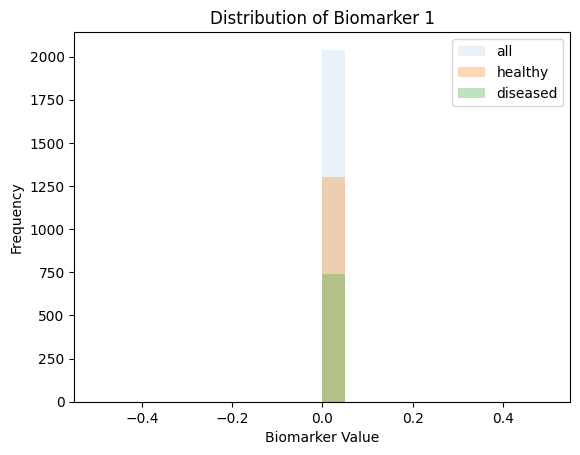

In [2]:
from biomarker_simulation import BiomarkerSimulation
import matplotlib.pyplot as plt
import numpy as np

n_patients_stage_expanded = {
    1: 400, 2: 500, 3: 400, 4: 140, 5: 160,
    6: 120, 7: 100, 8: 80, 9: 80, 10: 60
}

# Sigmoid params
biomarkers_params_sigmoid = {
    0: {'s': 6, 'c': 3},
    1: {'s': 12, 'c': 12},
    2: {'s': 17, 'c': 10},
    3: {'s': 23, 'c': 11},
    4: {'s': 28, 'c': 2},
    5: {'s': 34, 'c': 12},
    6: {'s': 40, 'c': 10},
    7: {'s': 45, 'c': 8},
    8: {'s': 51, 'c': 6},
    9: {'s': 57, 'c': 5},
    10: {'s': 62, 'c': 2}
}

# Instantiate and simulate using the sigmoid model
simulator_sigmoid = BiomarkerSimulation(n_patients_stage_expanded, biomarkers_params_sigmoid, 'sigmoid_inv', add_noise=True, noise_std=0.95, random_state=2020, n_stages=40)
X_sigmoid, y_sigmoid, stages_sigmoid = simulator_sigmoid.simulate()

print("Sigmoidal Model:")
print("X shape:", X_sigmoid.shape)
print("Y shape:", y_sigmoid.shape)

# Plot biomarker progression
simulator_sigmoid.plot_biomarkers()
simulator_sigmoid.plot_patient_stages()
simulator_sigmoid.plot_biomarker_distribution(biomarker_index=0)


In [3]:
# debug plot
# plt.hist(X[:, 1], bins=20)
# plt.xlabel('Biomarker Value')
# plt.ylabel('Frequency')
# plt.title('Distribution of Biomarker')
# plt.legend()
# plt.show()

In [4]:
mcmc_analysis_sigmoid = MCMCAnalysis(X_sigmoid, y_sigmoid)
first_ten_orders_sigmoid, rho_sigmoid, loglike_sigmoid, update_iters_sigmoid, probas_sigmoid = mcmc_analysis_sigmoid.perform_analysis()

print("First 10 MCMC sampled orders (Sigmoid):", first_ten_orders_sigmoid)
print("Spearman's rho between initial and first MCMC order (Sigmoid):", rho_sigmoid)

C:\Users\semch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_distn_infrastructure.py:2069: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\Users\semch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_distn_infrastructure.py:2069: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
100%|██████████| 10000/10000 [00:01<00:00, 8127.84it/s]


Greedy Ascent Result: [ 1  7 10  6  0  8  3  4  2  5  9]


100%|██████████| 500000/500000 [01:03<00:00, 7841.49it/s]

An error occurred during MCMC: MCMC did not generate any orders.
First 10 MCMC sampled orders (Sigmoid): None
Spearman's rho between initial and first MCMC order (Sigmoid): None


Transition Matrix Model:
X shape: (1020, 11)
Y shape: (1020,)


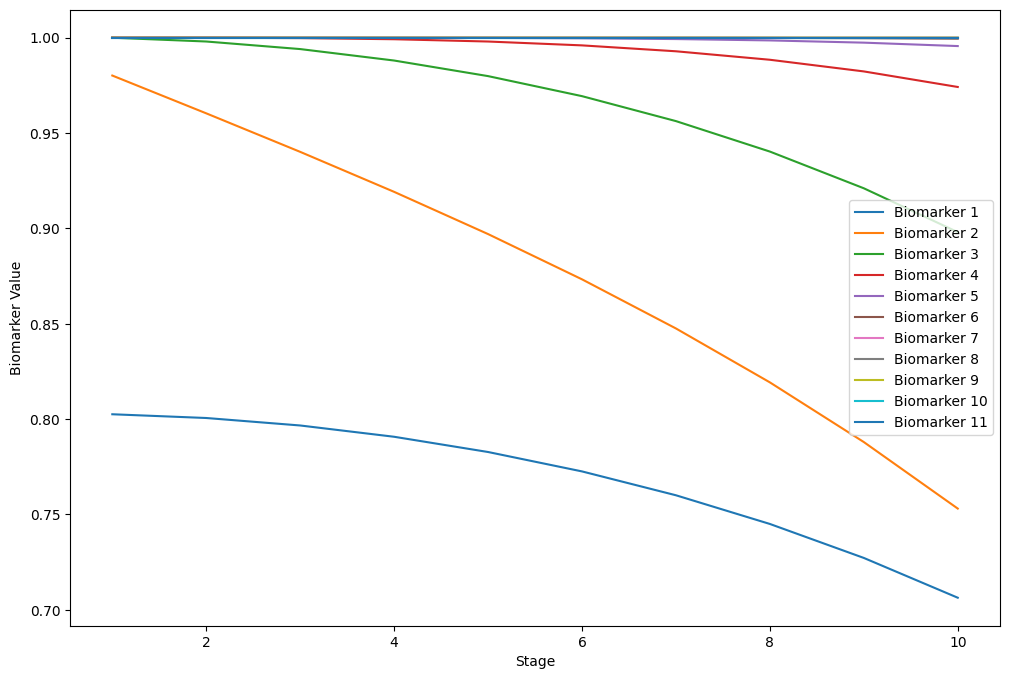

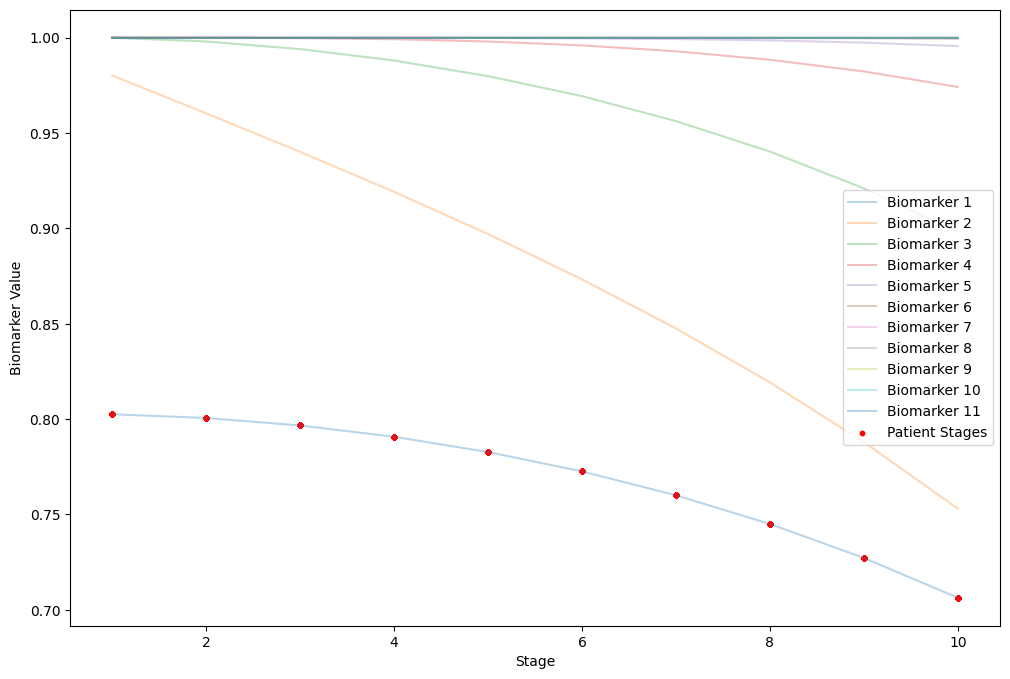

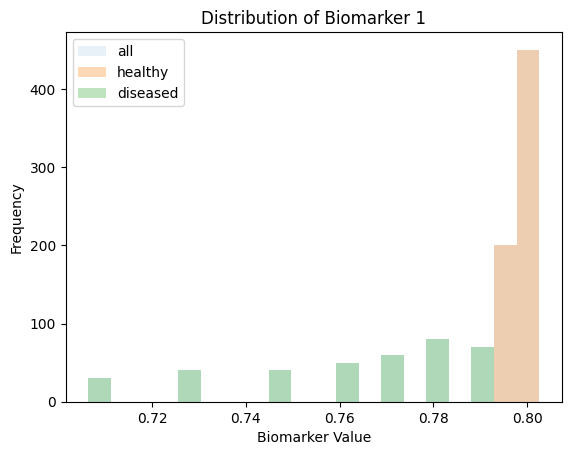

In [6]:
from biomarker_simulation import BiomarkerSimulation
from biomarker_utils import generate_transition_matrix, initialize_biomarkers
import matplotlib.pyplot as plt
import numpy as np

# Patient STages
n_patients_stage_expanded = {
    1: 200, 2: 250, 3: 200, 4: 70, 5: 80,
    6: 60, 7: 50, 8: 40, 9: 40, 10: 30
}

# Define the number of biomarkers and the coefficient for the transition matrix
# Generate the transition matrix and initial biomarkers
num_biomarkers = 11
coeff = 1e-1
transition_matrix = generate_transition_matrix(num_biomarkers, coeff)
y_init = initialize_biomarkers(num_biomarkers, init_value=0.9)

# Define the biomarker parameters
biomarkers_params_transition = {
    'transition_matrix': transition_matrix,
    'y_init': y_init
}

# Instantiate and simulate using the transition matrix model
simulator_transition = BiomarkerSimulation(n_patients_stage_expanded, biomarkers_params_transition, method='transition_matrix', n_stages=40)
X_transition, y_transition, stages_transition = simulator_transition.simulate()

print("Transition Matrix Model:")
print("X shape:", X_transition.shape)
print("Y shape:", y_transition.shape)

# Plot biomarker progression
simulator_transition.plot_biomarkers()
simulator_transition.plot_patient_stages()
simulator_transition.plot_biomarker_distribution(biomarker_index=0)


#### MCMC analysis of Transition Matrix based biomarkers

In [8]:
mcmc_analysis_transition = MCMCAnalysis(X_transition, y_transition)
first_ten_orders_transition, rho_transition, loglike_transition, update_iters_transition, probas_transition = mcmc_analysis_transition.perform_analysis()

print("First 10 MCMC sampled orders (Transition Matrix):\n", first_ten_orders_transition)
print("Spearman's rho between initial and first MCMC order (Transition Matrix):", rho_transition)


C:\Users\semch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_distn_infrastructure.py:2069: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\Users\semch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_distn_infrastructure.py:2069: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
100%|██████████| 500000/500000 [00:44<00:00, 11162.07it/s]


IndexError: list index out of range

## ODE based

ODE Model:
X shape: (1000, 11)
Y shape: (1000,)


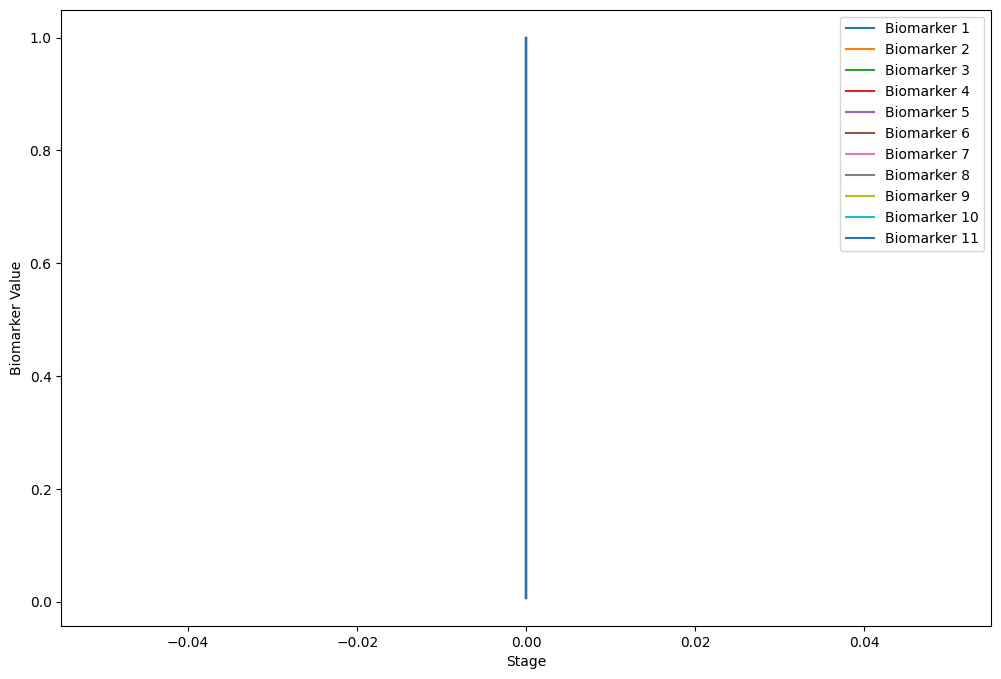

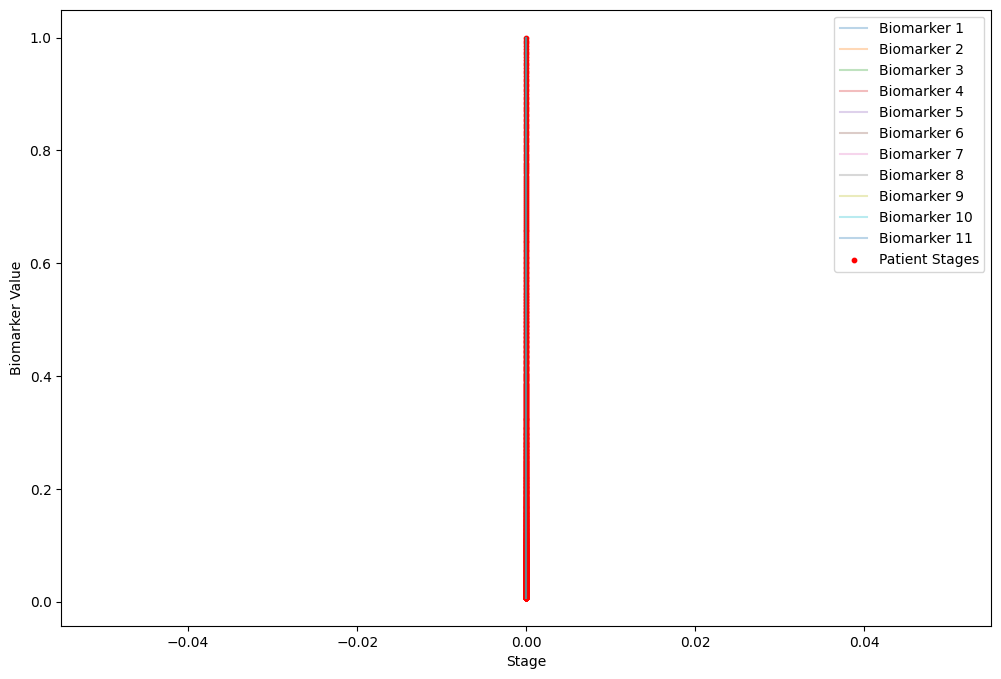

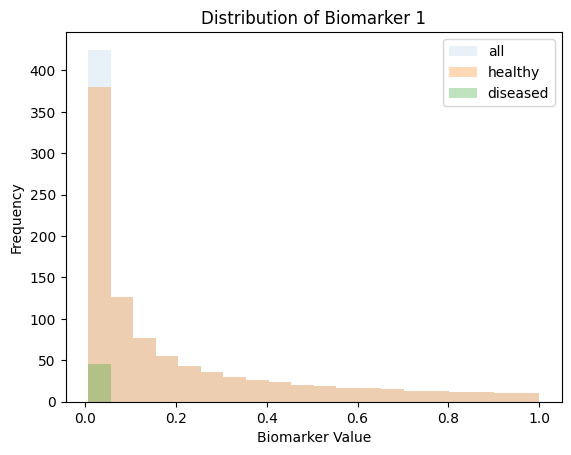

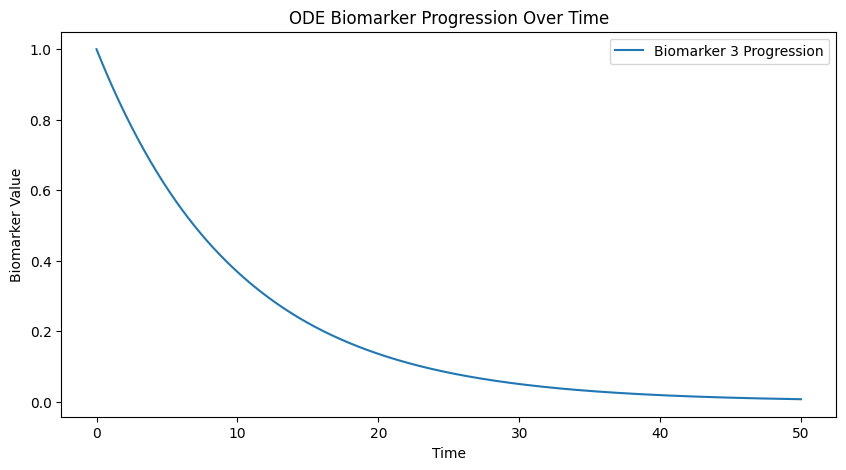

In [6]:
from biomarker_simulation import BiomarkerSimulation
from biomarker_utils import generate_transition_matrix, initialize_biomarkers
import matplotlib.pyplot as plt
import numpy as np

# Params for the ODE model
n_patients_stage_ode = {}  # not used for ODE but needed for class instantiation
biomarkers_params_ode = {
    'y_init': np.array([1.0] * 11),  # initial conditions for each biomarker
    't_span': (0, 50),
    'n_steps': 1000
}

# Instantiate and simulate using the ODE model
simulator_ode = BiomarkerSimulation(n_patients_stage_ode, biomarkers_params_ode, 'ode', n_stages=40)
X_ode, y_ode, stages_ode = simulator_ode.simulate()

print("ODE Model:")
print("X shape:", X_ode.shape)
print("Y shape:", y_ode.shape)

# Plot biomarker progression
simulator_ode.plot_biomarkers()
simulator_ode.plot_patient_stages()
simulator_ode.plot_biomarker_distribution(biomarker_index=0)

# Plot a specific biomarker's progression over time
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(biomarkers_params_ode['t_span'][0], biomarkers_params_ode['t_span'][1], biomarkers_params_ode['n_steps']), X_ode[:, 3], label='Biomarker 3 Progression')
plt.title("ODE Biomarker Progression Over Time")
plt.xlabel('Time')
plt.ylabel('Biomarker Value')
plt.legend()
plt.show()


#### MCMC analysis of ODE based biomarkers

In [4]:
mcmc_analysis_ode = MCMCAnalysis(X_ode, y_ode)
first_ten_orders_ode, rho_ode, loglike_ode, update_iters_ode, probas_ode = mcmc_analysis_ode.perform_analysis()

print("First 10 MCMC sampled orders (ODE):\n", first_ten_orders_ode)
print("Spearman's rho between initial and first MCMC order (ODE):", rho_ode)

100%|██████████| 500000/500000 [01:38<00:00, 5098.08it/s]


First 10 MCMC sampled orders (ODE): [array([ 4,  3,  5,  2,  0,  7,  6, 10,  1,  9,  8]), array([ 4,  9,  5,  2,  0,  7,  6, 10,  1,  3,  8]), array([ 4,  8,  5,  2,  0,  7,  6, 10,  1,  3,  9]), array([ 4,  8,  5, 10,  0,  7,  6,  2,  1,  3,  9]), array([ 4,  8,  5, 10,  0,  7,  9,  2,  1,  3,  6]), array([ 4,  8,  5, 10,  0,  7,  9,  6,  1,  3,  2]), array([ 4,  8,  5, 10,  0,  7,  9,  6,  2,  3,  1]), array([ 4,  8,  5, 10,  7,  0,  9,  6,  2,  3,  1]), array([ 4,  8,  5, 10,  7,  2,  9,  6,  0,  3,  1]), array([ 8,  4,  5, 10,  7,  2,  9,  6,  0,  3,  1])]
Spearman's rho between initial and first MCMC order (ODE): -0.08181818181818183
